In [2]:
# Generate a summary statistics 
import pandas as pd
data_Path = '~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Japan_Life_Expectency/data/processed/Cleaned_Japan_Life_Expectancy_log_transform.xlsx'
data=pd.read_excel(data_Path)
print(data.columns)
print(data.describe())

Index(['Prefecture', 'Life_expectancy', 'Physician_100kP', 'Junior_col_%',
       'University_%', 'Public_Hosp_%', 'Psych_Hosp_100kP', 'Psych_Beds_100kP',
       'Nurses_100kP', 'Avg_Work_Hours_Month', 'Elementary_school',
       'Sport_fac_1MP', 'Forest_Land_%', 'Income_capita',
       'Population_Density_km2', 'General_Hospital_100kP',
       'General_Hospital_Beds_100k', 'Ambulances_100kP',
       'Health_Expenditure_%', 'Educ_Expenditure_%', 'Welfare_Expenditure_%',
       'Prefecture_encoded', 'Salary_Log', 'Park_Land_%_Log'],
      dtype='object')
       Life_expectancy  Physician_100kP  Junior_col_%  University_%  \
count        47.000000        47.000000     47.000000     47.000000   
mean         84.525745       261.438298     13.627660     18.621277   
std           0.503133        40.948842      1.243191      4.459818   
min          82.800000       177.800000     11.300000     11.800000   
25%          84.240000       230.400000     12.850000     15.750000   
50%          8

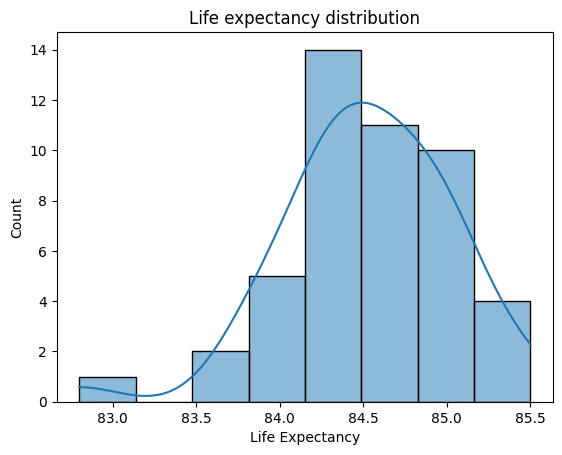

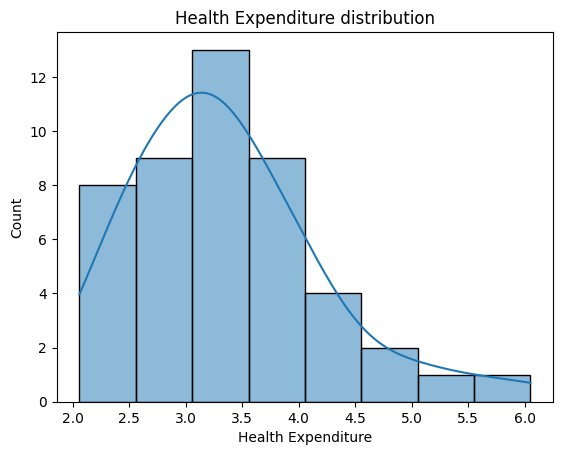

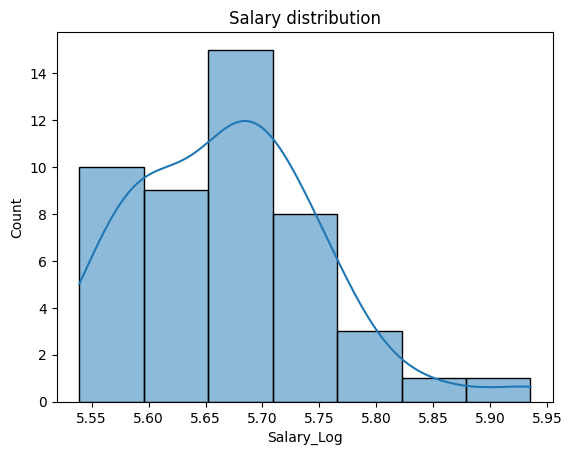

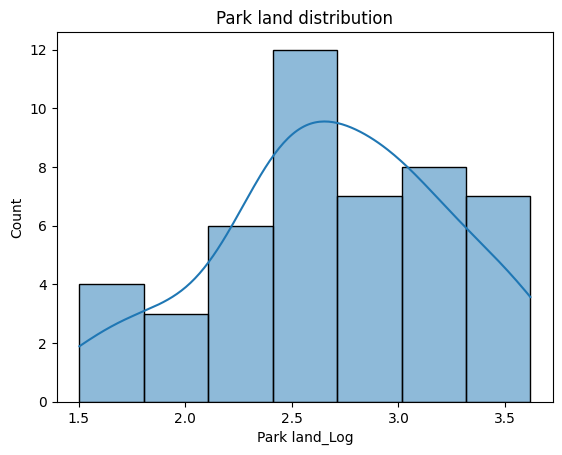

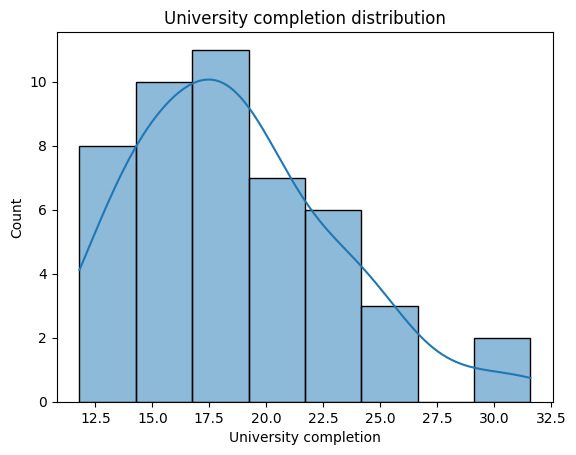

In [24]:
# Plot distributions of features 
import seaborn as sns 
import matplotlib.pyplot as plt
#Histograms of key features
#Distribution of life expectancy
sns.histplot(data['Life_expectancy'], kde=True)
plt.title("Life expectancy distribution")
plt.xlabel("Life Expectancy")
plt.show()
#distribution of health expenditure
sns.histplot(data['Health_Expenditure_%'], kde=True)
plt.title("Health Expenditure distribution")
plt.xlabel("Health Expenditure")
plt.show()
#distribution of salary
sns.histplot(data['Salary_Log'], kde=True)
plt.title("Salary distribution")
plt.xlabel("Salary_Log")
plt.show()
#distribution of park land
sns.histplot(data['Park_Land_%_Log'], kde=True)
plt.title("Park land distribution")
plt.xlabel("Park land_Log")
plt.show()
#distribution of university completion
sns.histplot(data["University_%"], kde=True)
plt.title("University completion distribution")
plt.xlabel("University completion")
plt.show()

                            Life_expectancy  Physician_100kP  Junior_col_%  \
Life_expectancy                    1.000000         0.321545      0.569207   
Physician_100kP                    0.321545         1.000000     -0.035781   
Junior_col_%                       0.569207        -0.035781      1.000000   
University_%                       0.560164         0.085263      0.493770   
Public_Hosp_%                     -0.091038        -0.222218     -0.236237   
Psych_Hosp_100kP                  -0.240471         0.284066     -0.286641   
Psych_Beds_100kP                  -0.263259         0.412624     -0.315751   
Nurses_100kP                      -0.054996         0.634156     -0.168570   
Avg_Work_Hours_Month              -0.111068         0.087101     -0.157295   
Elementary_school                 -0.559066        -0.161057     -0.549658   
Sport_fac_1MP                     -0.130514         0.011963     -0.067754   
Forest_Land_%                      0.092351         0.266828    

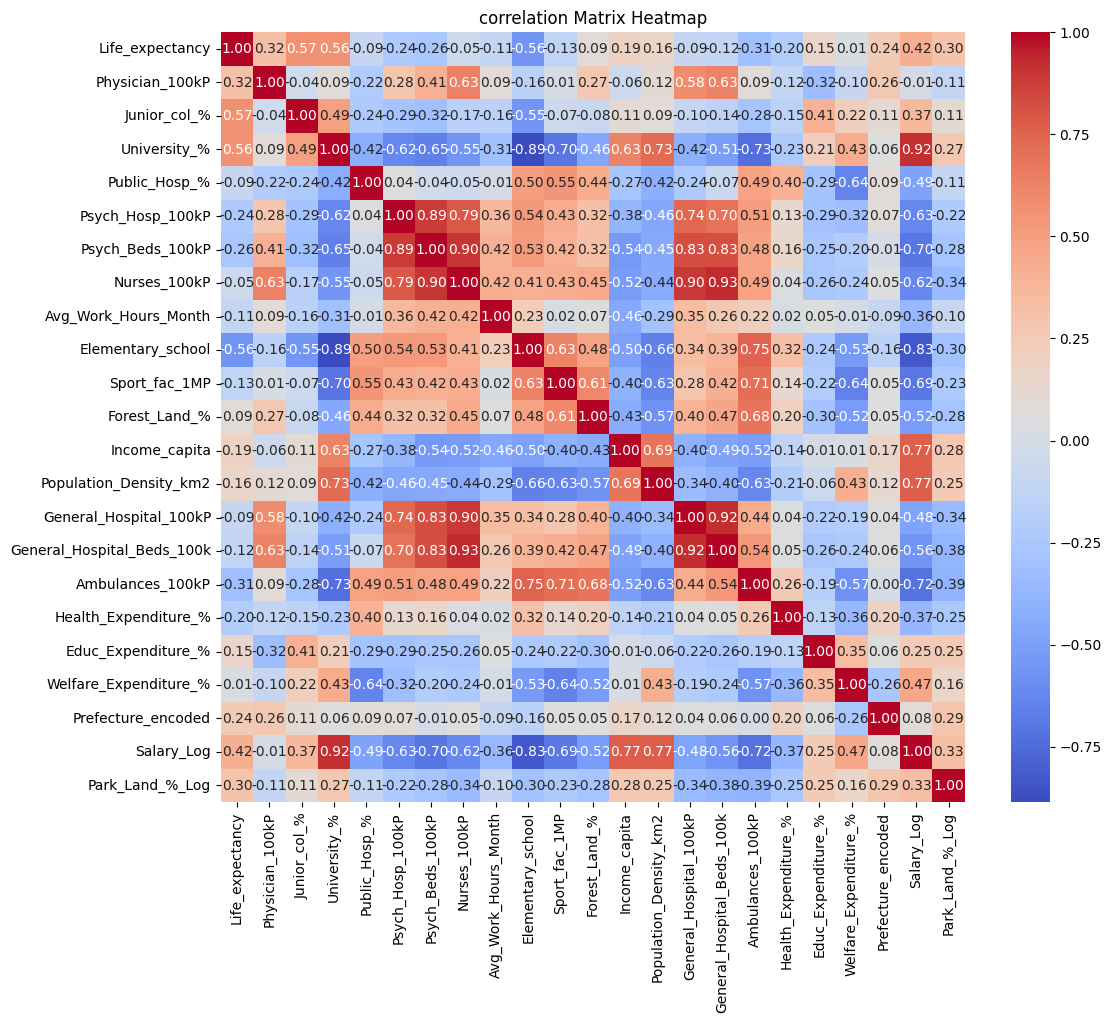

In [25]:
# Correlation Heatmap
#select only numerical data 
numeric_data=data.select_dtypes(include=["float64", "int64"])
#compute correlation matrix
plt.figure(figsize=(12, 10))
correlation_Matrix=numeric_data.corr()
print(correlation_Matrix)
#plot heatmap rounding to 2 decimals: Primary finding strong correlation between life expectancy and (people finished junior high school and college and higher salaries)
sns.heatmap(correlation_Matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation Matrix Heatmap")
plt.show()

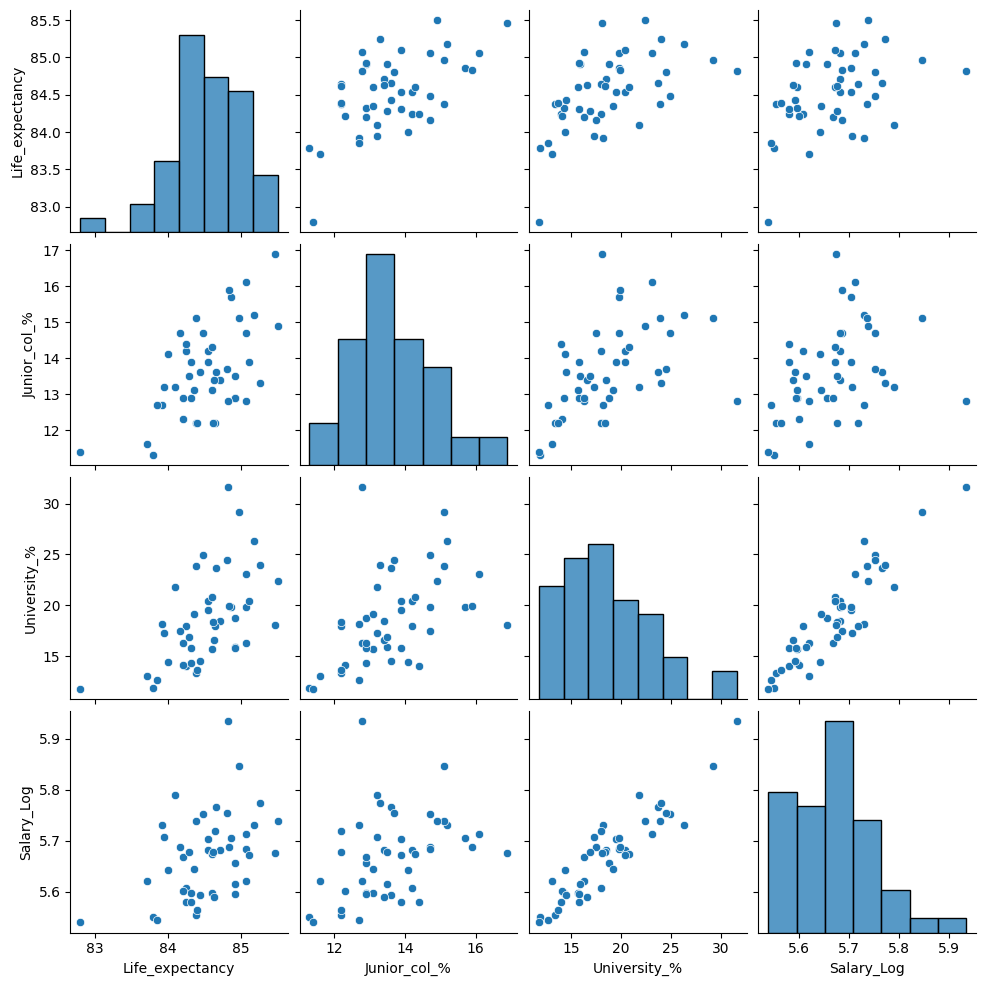

In [32]:
#Pair plots for key features 
key_features=['Life_expectancy', 'Junior_col_%', 'University_%', 'Salary_Log']
sns.pairplot(data[key_features])
plt.show()


In [ ]:
#Boxplot for outlier detection
sns.boxplot(x=data['Income_capita'])
plt.title("Box plot income per capita")
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF: variance inlation factor
X=data[[ 'University_%', 'Salary_Log', 'Junior_col_%']]
vif_data=pd.DataFrame()
vif_data["feature"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      feature
0   24.473552
1  136.520418
2  158.462611


# Observations from EDA

- using correlation Heatmap : Strong positive correlation between `University_%`,`Junior_col_%` and `Life_expectancy` (+0.57).
- Moderately Strong positive correlation between `Physician_100kP`,`Park_land_%`,`Salary_Log` and `Life_expectancy`(~0.3)
- Negative correlation for `Elementary_school_%` (-0.56), suggesting that higher elementary education percentages correspond to lower life expectancy.
- Salary shows a complex, nonlinear relationship with life expectancy (further investigation required).
- Using VIF theres a severe multicolinearity between  `University_%`,`Junior_col_%`,`Salary_Log`
